In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#creating synthetic data
def get_data(N, use_noise):
    ts = np.sin(0.1 * np.arange(N)) + int(use_noise) * np.random.randn(N) * 0.1
    return ts

#plotting time series
def plot_ts(ts):
    plt.figure(figsize=[15,4])
    plt.plot(ts, color = 'black')
    plt.grid()
    plt.show()

def plot_ts_train_test(tstrain, tstest):
    plt.figure(figsize=[15,4])
    plt.plot(tstrain, label = 'train')
    plt.plot(range(len(tstrain), len(tstrain) + len(tstest)), tstest, label = 'test')
    plt.legend()
    plt.grid()
    plt.show()

def plot_two_ts_same_range(ts1, ts2):
    plt.figure(figsize=[15,4])
    plt.plot(ts1, label = 'ts1')
    plt.plot(ts2, label = 'ts2')
    def rmse(ytrue, ypred): return np.sqrt(((ytrue-ypred)**2).mean())
    plt.title('RMSE:' + str(rmse(ts1, ts2)))
    plt.grid()
    plt.show()

#creating the dataset
def dataset(ts, lag_window):
    T = lag_window
    X = []
    Y = []
    for t in range(len(ts) - T):
        x = ts[t: t+T]
        y = ts[t+T]
        X.append(x)
        Y.append(y)

    df = pd.DataFrame(np.c_[np.arange(T+1, len(ts)+1), X, Y], columns = ['date'] + ['lag_'+str(i) for i in list(range(T,0, -1))] + ['target'])
    df.date = df.date.astype(int)
    return df

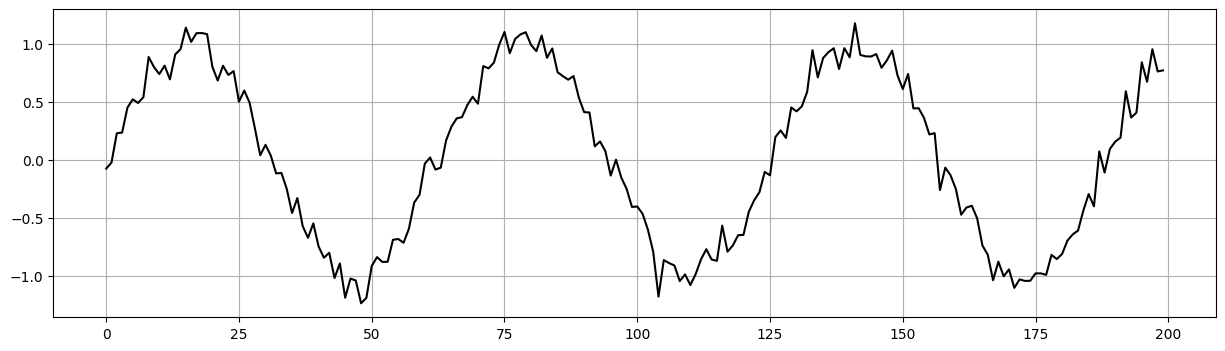

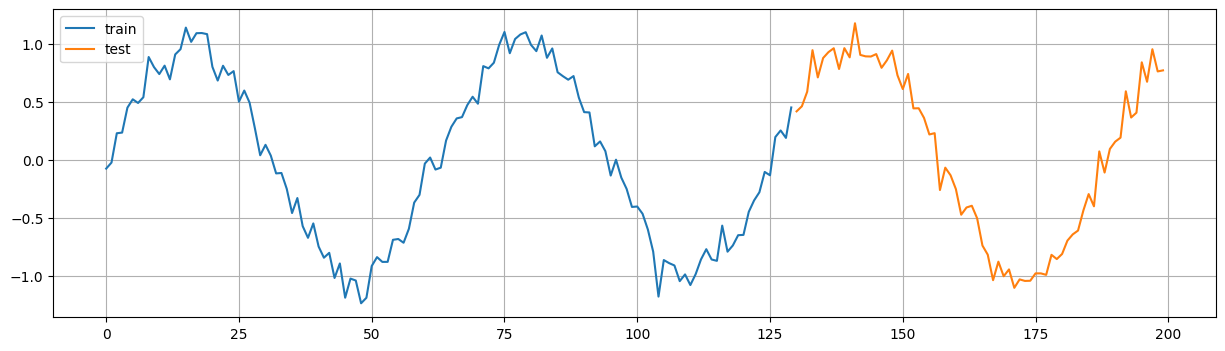

In [3]:
ts = get_data(N = 200, use_noise = True)

ts_train = ts[:130]
ts_test = ts[130:]

plot_ts(ts)
plot_ts_train_test(tstrain=ts_train, tstest=ts_test)


In [4]:
df_train = dataset(ts = ts_train, lag_window = 10)
N = df_train.shape[0]
X, Y = df_train.drop(['date','target'], axis = 1).values, df_train.target.values
print(X.shape, Y.shape)
df_train

(120, 10) (120,)


,date,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,target
0,11,-0.077854,-0.025937,0.226738,0.232412,0.447473,0.519315,0.487743,0.537081,0.883832,0.797023,0.736855
1,12,-0.025937,0.226738,0.232412,0.447473,0.519315,0.487743,0.537081,0.883832,0.797023,0.736855,0.809354
2,13,0.226738,0.232412,0.447473,0.519315,0.487743,0.537081,0.883832,0.797023,0.736855,0.809354,0.691353
3,14,0.232412,0.447473,0.519315,0.487743,0.537081,0.883832,0.797023,0.736855,0.809354,0.691353,0.906135
4,15,0.447473,0.519315,0.487743,0.537081,0.883832,0.797023,0.736855,0.809354,0.691353,0.906135,0.951483
...,...,...,...,...,...,...,...,...,...,...,...,...
115,126,-0.872853,-0.569155,-0.793966,-0.740276,-0.651886,-0.649155,-0.450541,-0.352258,-0.281698,-0.106665,-0.135621
116,127,-0.569155,-0.793966,-0.740276,-0.651886,-0.649155,-0.450541,-0.352258,-0.281698,-0.106665,-0.135621,0.193861
117,128,-0.793966,-0.740276,-0.651886,-0.649155,-0.450541,-0.352258,-0.281698,-0.106665,-0.135621,0.193861,0.250822
118,129,-0.740276,-0.651886,-0.649155,-0.450541,-0.352258,-0.281698,-0.106665,-0.135621,0.193861,0.250822,0.186688


In [14]:
#building the Simple RNN model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X.shape[1], 1)),
    #tf.keras.layers.SimpleRNN(5, activation = 'tanh'),
    tf.keras.layers.LSTM(150, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mse')

res = model.fit(X, Y, epochs = 80)

Epoch 1/80
4/4 [==============================] - 2s 12ms/step - loss: 0.4392
Epoch 2/80
4/4 [==============================] - 0s 13ms/step - loss: 0.1883
Epoch 3/80
4/4 [==============================] - 0s 11ms/step - loss: 0.1631
Epoch 4/80
4/4 [==============================] - 0s 10ms/step - loss: 0.1413
Epoch 5/80
4/4 [==============================] - 0s 10ms/step - loss: 0.1077
Epoch 6/80
4/4 [==============================] - 0s 10ms/step - loss: 0.1047
Epoch 7/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0966
Epoch 8/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0822
Epoch 9/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0686
Epoch 10/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0591
Epoch 11/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0475
Epoch 12/80
4/4 [==============================] - 0s 10ms/step - loss: 0.0395
Epoch 13/80
4/4 [==============================] - 0s 10ms/st

4/4 [==============================] - 0s 5ms/step
corr: 0.9844609856454491
4/4 [==============================] - 0s 5ms/step


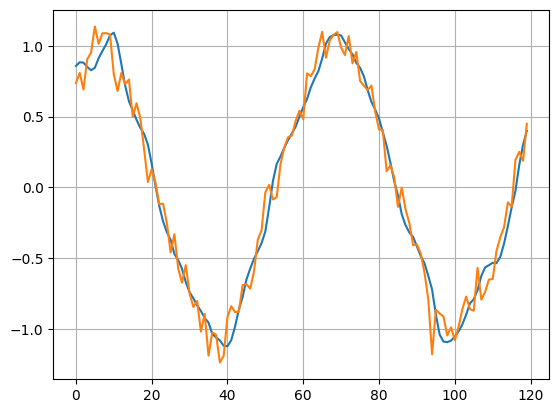

In [15]:
print('corr:', np.corrcoef([model.predict(X).reshape(-1,), Y])[0][1])
plt.plot(model.predict(X))
plt.plot(Y)
plt.grid()
plt.show()

3/3 [==============================] - 0s 4ms/step


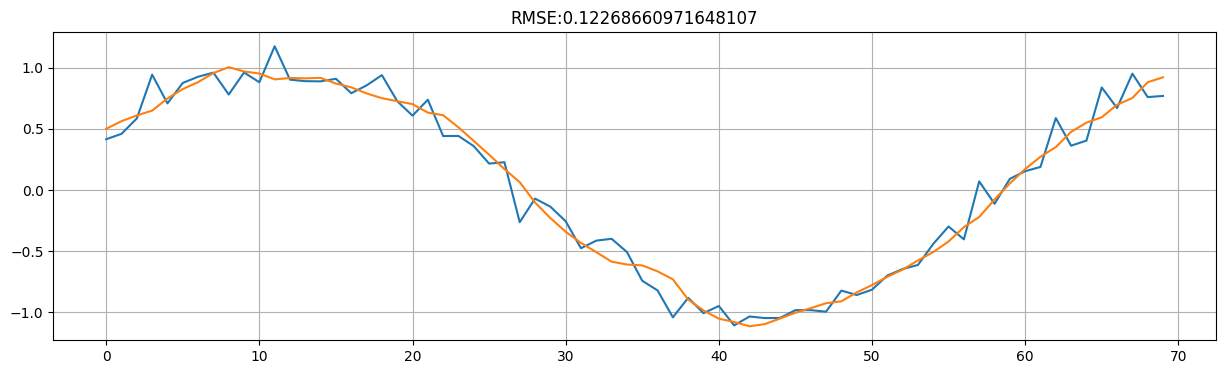

In [16]:
#WRONG WAY!!
T = 10 
df_test = dataset(np.concatenate([ts_train[-T:], ts_test]), lag_window = T)
Xtest, Ytest = df_test.drop(['date','target'], axis = 1).values, df_test.target.values
ypred_test = model.predict(Xtest).reshape(-1,)

plot_two_ts_same_range(ts1 = ts_test, ts2 = ypred_test)

1/1 [==============================] - 0s 21ms/step


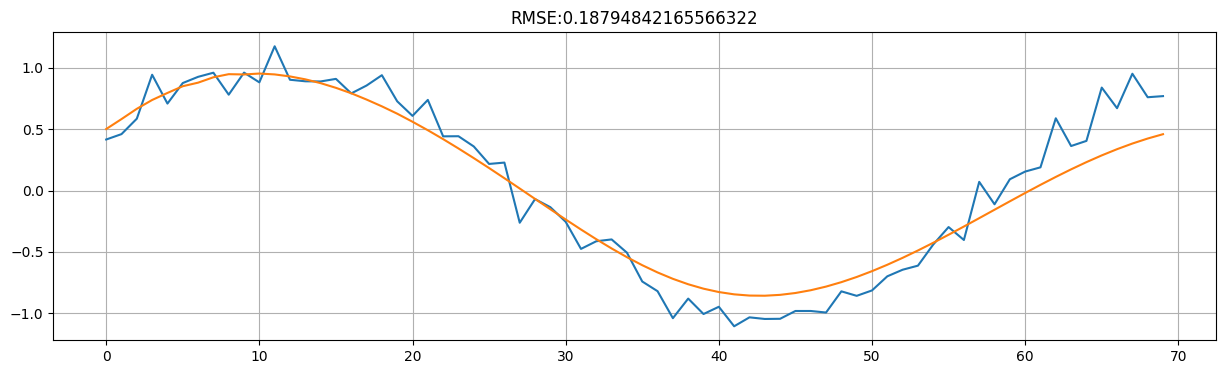

In [17]:
#CORRECT WAY!!
ypreds__ = []
last_T_values = ts_train[-T:]
for i in range(len(ts_test)):
    p = model.predict(last_T_values.reshape(1,T))[0][0]
    ypreds__.append(p)
    last_T_values = np.concatenate([last_T_values[1:].reshape(-1,), np.array(p).reshape(-1,)])

plot_two_ts_same_range(ts1 = ts_test, ts2 = np.array(ypreds__))

In [18]:
#conclusion: it seems that the simple RNN is just overfitting the data; the simple ANN (which was essentially an AR(10) model) performed better!

#but if you change the Simple RNN to a LSTM, the results get better!